# Finetune your Neural Network and save it

🎯 **Goals of this challenge**
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in datasets that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in USD (thousands)***
- and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metrics.

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### (0.1) Loading the dataset

In [ ]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

In [ ]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

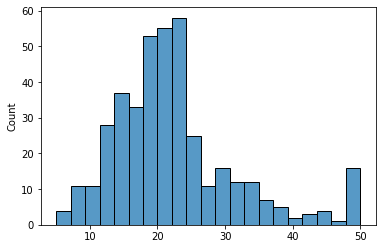

In [ ]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [ ]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [ ]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling** and move on quickly to the modeling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set. (other than showing off)? 

* Compute the Mean Absolute Error on the test set using a _dumb prediction_ of the mean value of `y_train` computed on the train set.

In [ ]:
y_pred = np.mean(y_train)
print(f'The mean prediction is {y_pred:.3f}')

absolute_error_test_baseline = [np.abs(y_true - y_pred) for y_true in y_test]
mean_absolute_error_test_baseline = np.mean(absolute_error_test_baseline)

print(f'The benchmark mean absolute error is of {mean_absolute_error_test_baseline:.3f}')

The mean prediction is 22.395
The benchmark mean absolute error is of 6.533


## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    # $CHALLENGIFY_BEGIN    
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_dim = X_train.shape[-1])) # highly recommend this option
    model.add(layers.Dense(7, activation='relu'))                                 # instead of input_dim = 13
    model.add(layers.Dense(1, activation='linear'))
    
    return model
    # $CHALLENGIFY_END

❓ **Question: number of parameters** ❓

How many parameters do have in this model? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear regression combined with an activation function so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that:
* takes _both_ a _model_ and an _optimizer_ as arguments,
* ***compiles*** the model,
* and returns the compiled model.

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated.

In [ ]:
def compile_model(model, optimizer_name):
    
    # $CHALLENGIFY_BEGIN
    model.compile(loss = 'mse', 
                  optimizer = optimizer_name,
                  metrics = ['mae'])
    
    return model
    # $CHALLENGIFY_END

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# $CHALLENGIFY_BEGIN
model = compile_model(initialize_model(), 'adam')

es = EarlyStopping(patience =10,
                   restore_best_weights = True)

history = model.fit(X_train, 
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size = 16, 
                    epochs = 1000, 
                    callbacks = [es], 
                    verbose=0)

res = model.evaluate(X_test, y_test)[1]
res
# $CHALLENGIFY_END

4/4 [==============================] - 0s 2ms/step - loss: 34.0894 - mae: 4.1606


4.160585403442383

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [ ]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 4.1606 for the Neural Network vs. 6.5330 for the baseline


### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [ ]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 1ms/step - loss: 45.7545 - mae: 4.8816
MAE with the rmsprop optimizer: 4.8816  reached in 2 s after 76 epochs


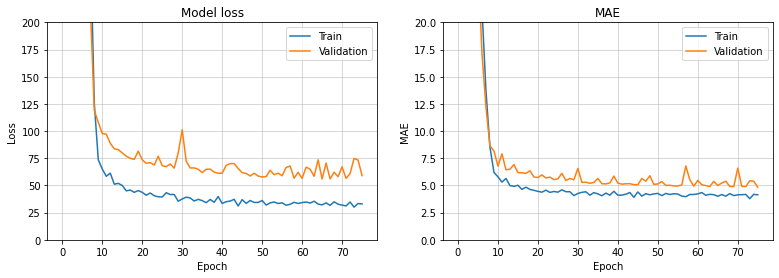

4/4 [==============================] - 0s 1ms/step - loss: 32.0896 - mae: 4.1373
MAE with the adam optimizer: 4.1373  reached in 5 s after 194 epochs


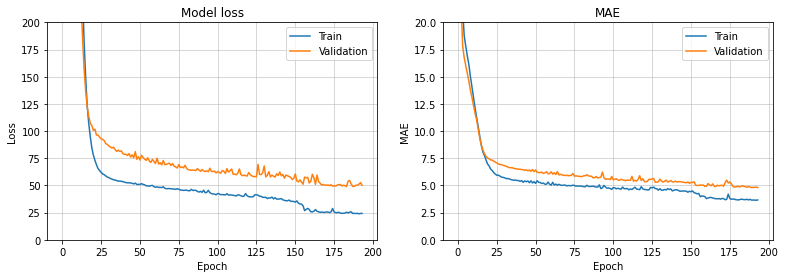

4/4 [==============================] - 0s 1ms/step - loss: 100.6384 - mae: 7.3567
MAE with the adagrad optimizer: 7.3567  reached in 11 s after 500 epochs


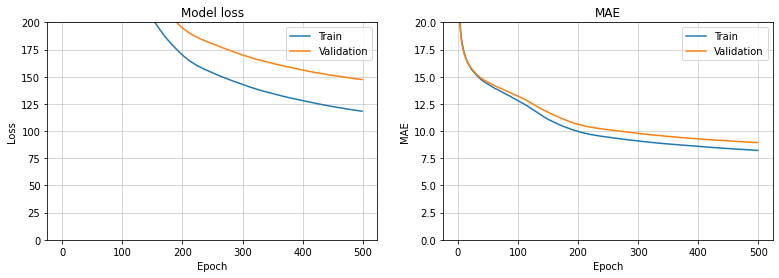

In [ ]:
import time

results = []

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    
    start_time = time.time()
    
    model = compile_model(initialize_model(), optimizer)

    es = EarlyStopping(patience = 10, restore_best_weights = True)

    history = model.fit(X_train, y_train, 
                        batch_size = 16, 
                        epochs = 500, 
                        validation_split = 0.3,
                        callbacks = [es], 
                        verbose = 0)

    res = model.evaluate(X_test, y_test)[1]
    results.append(res)
    
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the baseline model you evaluated at the beginning of the notebook?

In [ ]:
# MAE on the test set for different optimizers
for optimizer, result in zip(['rmsprop', 'adam', 'adagrad'], results):
    print(f"The MAE on the test set with the {optimizer} optimizer is equal to {result:.2f}")
    
# MAE on the test set for the baseline model    
print("-"*5)    
print(f"The MAE on the test set with the baseline model is equal to {mae_test_baseline:.2f}")

The MAE on the test set with the rmsprop optimizer is equal to 4.88
The MAE on the test set with the adam optimizer is equal to 4.14
The MAE on the test set with the adagrad optimizer is equal to 7.36
-----
The MAE on the test set with the baseline model is equal to 6.53


<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our best performing optimizer is **`adam`**. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and he/she has already been helping us achieve remarkable results.

---

❗️ So, what's next in this challenge? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate***? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here: 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

4/4 [==============================] - 0s 1ms/step - loss: 31.4221 - mae: 4.1218
Mean absolute error with a learning rate of 0.1: 4.1218


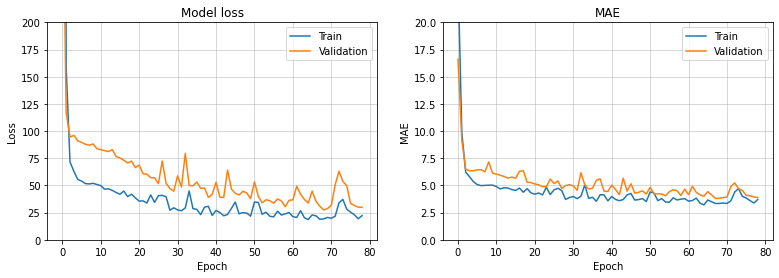

CPU times: user 3.23 s, sys: 440 ms, total: 3.67 s
Wall time: 2.71 s


In [ ]:
%%time

# 1. Instantiating the Adam optimizer with a learning rate alpha = 0.1
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.1)

# 2. Initializing the model
model = initialize_model()

# 3. Compiling the model with the custom Adam optimizer
model = compile_model(model, adam)

# 4. Training the neural net
es = EarlyStopping(patience = 10)
history = model.fit(X_train,
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size=16, 
                    epochs = 1_000,
                    callbacks = [es],
                    verbose = 0)

# 5. Plot the history and evaluate the model
res = model.evaluate(X_test, y_test)[1]
res
print(f'Mean absolute error with a learning rate of 0.1: {res:.4f}')
plot_loss_mae(history)

❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

4/4 [==============================] - 0s 2ms/step - loss: 75.1419 - mae: 6.7015
MAE with a learning rate of 0.0001 --> 6.7015


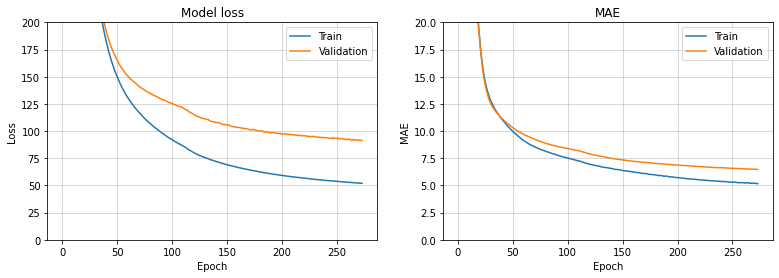

4/4 [==============================] - 0s 1ms/step - loss: 42.4416 - mae: 4.6216
MAE with a learning rate of 0.001 --> 4.6216


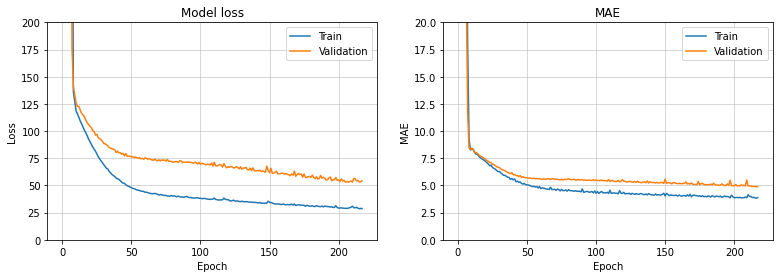

4/4 [==============================] - 0s 1ms/step - loss: 45.9044 - mae: 5.3746
MAE with a learning rate of 0.01 --> 5.3746


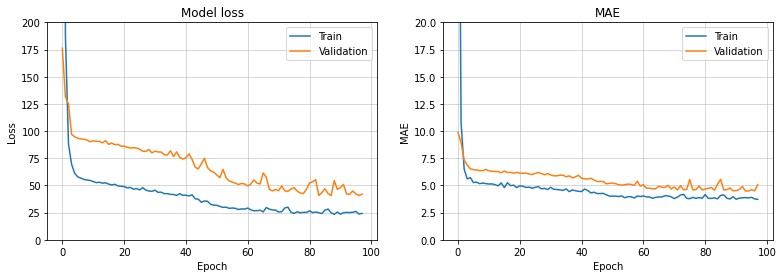

4/4 [==============================] - 0s 2ms/step - loss: 84.5616 - mae: 6.5137
MAE with a learning rate of 0.1 --> 6.5137


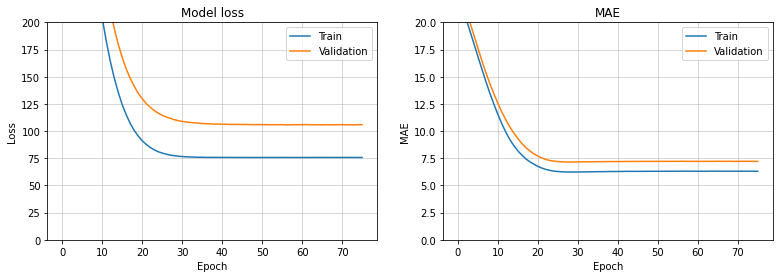

4/4 [==============================] - 0s 2ms/step - loss: 84.5671 - mae: 6.5137
MAE with a learning rate of 1 --> 6.5137


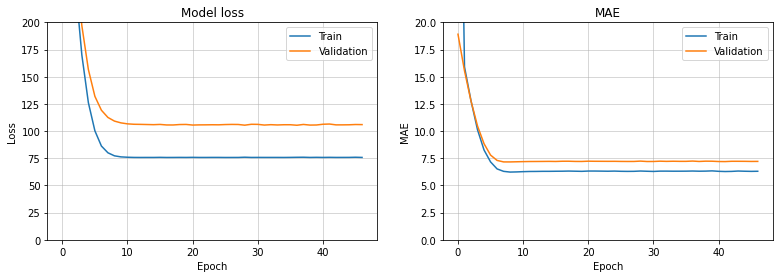

4/4 [==============================] - 0s 1ms/step - loss: 84.5479 - mae: 6.5137
MAE with a learning rate of 2 --> 6.5137


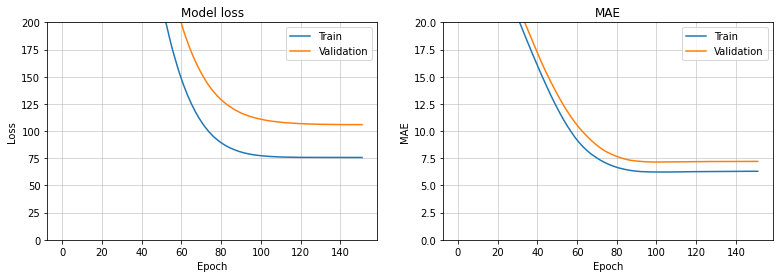

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:
    
    # $CHALLENGIFY_BEGIN
    
    # 1. Instantiating the Adam optimizer with a specific learning_rate
    adam = Adam(learning_rate = learning_rate)

    # 2. Initializing the model
    model = initialize_model()

    # 3. Compiling the model with the custom Adam optimizer
    model = compile_model(model, adam)

    # 4. Training the neural net
    es = EarlyStopping(patience = 10)
    history = model.fit(X_train,
                        y_train, 
                        validation_split = 0.3,
                        shuffle = True,
                        batch_size=16, 
                        epochs = 1_000,
                        callbacks = [es],
                        verbose = 0)

    # 5. Plot the history and evaluate the model
    res = model.evaluate(X_test, y_test)[1]
    results.append(res)
    
    print(f'MAE with a learning rate of {learning_rate} --> {res:.4f}')
    plot_loss_mae(history)
    
    # $CHALLENGIFY_END

## (3) The loss

---

❗️ It's important to **clearly understand the difference between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are: (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are: Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them***!
    - For Regression tasks, common metrics are: MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are: Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***>

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [ ]:
### First, optimizing the Mean Absolute error

model = initialize_model()
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mse'])

es = EarlyStopping(patience = 10)
history = model.fit(X_train,
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size=16, 
                    epochs = 1_000,
                    callbacks = [es],
                    verbose = 0)

res = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 4.4959 - mse: 45.0122


In [ ]:
print(f"MAE_train : {min(history.history['loss']):.4f} - MSE_train : {min(history.history['mse']):.4f}")
print(f"MAE_val : {min(history.history['val_loss']):.4f} - MSE_val : {min(history.history['val_mse']):.4f}")
print(f"MAE_test : {res[0]:.4f} - MSE_val : {res[1]:.4f}")

MAE_train : 3.5043 - MSE_train : 29.8707
MAE_val : 5.0165 - MSE_val : 61.2572
MAE_test : 4.4959 - MSE_val : 45.0122


In [ ]:
### Second, optimizing the Mean Squared Error
model = initialize_model()
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

es = EarlyStopping(patience = 10)
history = model.fit(X_train,
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size=16, 
                    epochs = 1_000,
                    callbacks = [es],
                    verbose = 0)

res = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 54.4269 - mae: 5.1999


In [ ]:
res = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")
print(f"MAE_test : {res[1]:.4f} - MSE_val : {res[0]:.4f}")

MAE_train : 4.3202 - MSE_train : 33.5067
MAE_val : 5.7047 - MSE_val : 60.9882
MAE_test : 5.1999 - MSE_val : 54.4269


🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameters are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint? Hell no, we have a much better solution:
- 💾 Save the weights of the optimized neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

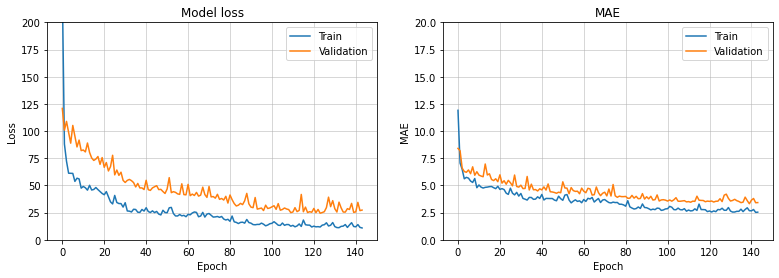

4/4 [==============================] - 0s 1ms/step - loss: 30.4189 - mae: 3.9558


3.955843448638916

In [ ]:
####################################
#    1. Initializing the model     #
####################################

model.add(layers.Dense(10, activation='relu', input_dim = X_train.shape[-1]))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


####################################
#      2. Compiling the model      #
####################################

# ------------------------- #
# 2.1. The learning rate    #
# ------------------------- #

# ...Starting with the initial learning rate...
initial_learning_rate = 0.01 

# ... We can decrease this learning rate progressively as the network converges
# ... More details on that in the Optional Section!
# ... Students are not expected to implemented the Exponential Decay here unless they are already familiar with it
# ... but I doubt it!

from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(initial_learning_rate, 
                               decay_steps = 2000, 
                               decay_rate = 0.5)

adam = Adam(learning_rate = lr_schedule)

# ------------------------------------------ #
# 2.2. Compiling with this customized Adam   #
# ------------------------------------------ #


model = compile_model(model, adam)

####################################
#          3. Fit the model        #
####################################

es = EarlyStopping(patience = 20)

history = model.fit(X_train, 
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size=16, 
                    epochs = 1000,
                    callbacks = [es], 
                    verbose = 0)

####################################
# 4. Analyzing the loss over time  #
####################################

plot_loss_mae(history)

####################################
# 5. Evaluating the results.       #
####################################

mae_test = model.evaluate(X_test, y_test)[1]
mae_test

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/davywai/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/davywai/code/lewagon/data-solutions/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network
plugins: anyio-3.3.3, dash-2.0.0
collecting ... collected 1 item

tests/test_solution.py::TestSolution::test_is_score_ok PASSED            [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master


📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using the `.save_model(model, 'name_of_my_model')` method

In [ ]:
models.save_model(model, 'my_beautiful_model')

2022-02-09 15:20:58.016075: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_beautiful_model/assets


In [ ]:
!ls

Finetune-and-save-your-neural-network.ipynb
Makefile
README.md
autotest.sh
learning_rate.png
my_beautiful_model
tests


In [ ]:
!ls my_beautiful_model

assets            keras_metadata.pb saved_model.pb    variables


📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [ ]:
loaded_model = models.load_model('my_beautiful_model')
loaded_model

In [ ]:
loaded_model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_124 (Dense)            (None, 7)                 77        
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 8         
_________________________________________________________________
dense_126 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_127 (Dense)            (None, 7)                 77        
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 8         
Total params: 330
Trainable params: 330
Non-trainable params: 0
_______________________________________________________

In [ ]:
res_from_loaded_model = loaded_model.evaluate(X_test, y_test, verbose = 0)[1]
res_from_loaded_model

3.955843448638916

In [ ]:
res_from_loaded_model == mae_test

True

## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practitioners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
X_train.shape[0]*0.7/16

17.674999999999997

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 5073.5015 - mae: 55.6870 - val_loss: 142.6722 - val_mae: 8.4851
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 170.2391 - mae: 10.0717 - val_loss: 148.9686 - val_mae: 9.6432
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 111.9395 - mae: 7.8877 - val_loss: 137.4960 - val_mae: 8.6467
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 90.3673 - mae: 6.8654 - val_loss: 109.0508 - val_mae: 7.9652
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 75.6395 - mae: 6.2361 - val_loss: 99.5466 - val_mae: 7.2066
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 68.0122 - mae: 5.9972 - val_loss: 93.0505 - val_mae: 6.8180
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 60.2483 - mae: 5.5786 - val_loss: 85.6784 - val_mae: 6.5878
Epoch 8/1000
18/18 [==============================] 

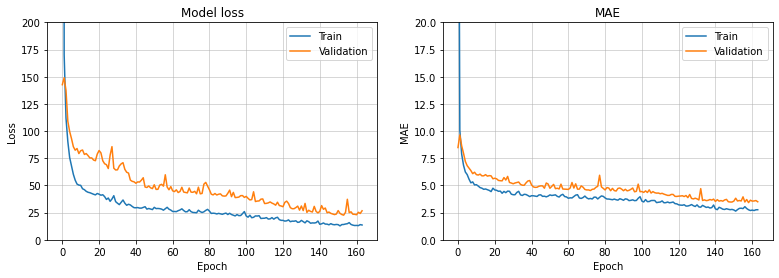

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# $CHALLENGIFY_BEGIN

initial_learning_rate = 0.01 # Default Adam

lr_schedule = ExponentialDecay(initial_learning_rate, 
                               decay_steps = 2000,    # every 2000 iterations
                               decay_rate = 0.5,      # we multiply the learning rate by the decay_rate
                                                      # PS: we have appox 404 x 70% /16 = 18 iterations per epoch
)

adam = Adam(learning_rate=lr_schedule)

model = initialize_model()
model = compile_model(model, adam)

es = EarlyStopping(patience=10)

history = model.fit(X_train,
                    y_train, 
                    validation_split = 0.3,
                    shuffle = True,
                    batch_size = 16, 
                    epochs = 1000, 
 
                  callbacks = [es], 
                    verbose = 1)

res = model.evaluate(X_test, y_test)[1]

print(f'Mean absolute error : {res:.4f}')
plot_loss_mae(history)

# $CHALLENGIFY_END

🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!